In [11]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import *
import math
import copy
%store -r random_numbers_matrix

In [13]:
def LR(x):
    return np.exp(-x/100)*0.01+0.00001

In [58]:
alpha = 4

In [59]:
n = 10000000
dim_array = [2,4,8,10,16,20,24]
Accuracy_dim_alpha4 = [0]*len(dim_array)
l = 0 

for dim in dim_array:
    # Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
    mu = np.zeros(dim) 
    identity_matrix = np.eye(dim) 
    cov_matrix = identity_matrix
    num_samples = 410 

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

    True_posetiv = np.zeros(len(dim_array))
    True_negativ = np.zeros(len(dim_array))
    False_posetiv = np.zeros(len(dim_array))
    False_negativ = np.zeros(len(dim_array))
    
    Y_updated = np.delete(Y,random_numbers_matrix[0].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    grad_sum = np.zeros(n) # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum[k]
        k += 1

    connections = Y[random_numbers_matrix[0].flatten().astype(int), 0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[0].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[l] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[l] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[l] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ[l] = np.sum((connections*sigmoid_value > 0) & (connections*sigmoid_value < 0.5))

    Accuracy_dim_alpha4[l] = (True_posetiv[l]+True_negativ[l])/(len(sigmoid_value))
    l += 1
    

200
-9595664.087112475
8760455.898262471
396931.3255910464
104504.72893605265
45965.4580271843
41663.18071434976
25061.37581548476
6989.246334116848
4057.764508837223
27522.018110084377
23717.626879285934
3528.5161696747527
-5200.589028279501
10507.775104164495
17091.549984866957
10501.332003692587
7936.825281353435
5501.634187968302
3895.612587310825
3728.637373696314
3692.0795446474513
5686.004836157532
4936.0255177745275
4075.3844343975798
7220.4271986059175
10545.040553314
7907.262245258302
5665.913456737268
3485.62154075093
2423.6517583089008
2762.671672078948
2827.3288814810367
2226.4608082115155
2331.8937604346065
2910.105777516441
3451.103449804599
3543.4722034649276
2717.5818744370663
1752.4012960964901
902.848036414045
106.20466147783736
-493.7673995033474
-752.4589434810587
190.61015971583038
1949.229561791115
1756.1357744666202
1092.3107255172472
1120.630295549363
1317.2326928274506
1195.8825992470738
849.6267877139762
424.8337071417609
142.3882494072859
533.9739013041308
1

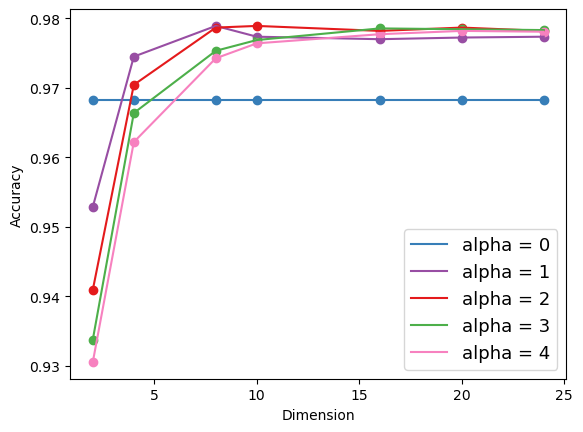

In [61]:
# Define x-axis values
plt.plot(dim_array, Accuracy_dim_alpha0, label='alpha = 0', color = '#377eb8')
plt.plot(dim_array, Accuracy_dim_alpha1, label='alpha = 1', color = '#984ea3')
plt.plot(dim_array, Accuracy_dim_alpha2, label='alpha = 2', color = '#e41a1c')
plt.plot(dim_array, Accuracy_dim_alpha3, label='alpha = 3', color = '#4daf4a')
plt.plot(dim_array, Accuracy_dim_alpha4, label='alpha = 4', color = '#f781bf')
plt.scatter(dim_array, Accuracy_dim_alpha0, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(dim_array, Accuracy_dim_alpha1, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(dim_array, Accuracy_dim_alpha2, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(dim_array, Accuracy_dim_alpha3, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.scatter(dim_array, Accuracy_dim_alpha4, facecolors='#f781bf', edgecolors='#f781bf')
plt.ylabel('Accuracy')
plt.xlabel('Dimension')
plt.legend(fontsize=13)
plt.show()